# Analiza modela


In [1]:
from settings import *
import os

model_picks = sorted(next(os.walk(spot))[1])
model_picks

['alexnet_10x',
 'alexnet_1x',
 'alexnet_3x',
 'googlenet_10x',
 'googlenet_1x',
 'googlenet_3x']

In [2]:
from fastai.vision.all import ClassificationInterpretation, load_learner
from utils.learners import create_dataloaders

analyses = {}
%%capture
for model in model_picks:
    analysis = {}
    dls = create_dataloaders(container, categories, show_batch=False)
    testee = {
        "breath": load_learner(spot/model/"breath.pkl"),
        "depth": load_learner(spot/model/"depth.pkl")
    }

    for key in categories.keys():
        analysis[key] = ClassificationInterpretation.from_learner(testee[key], dl=dls[key].train)
    
    analyses[model] = analysis

/home/trpquo/miniforge-pypy3/envs/fastai/lib/python3.11/site-packages/fastai/interpret.py:132: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**kwargs)


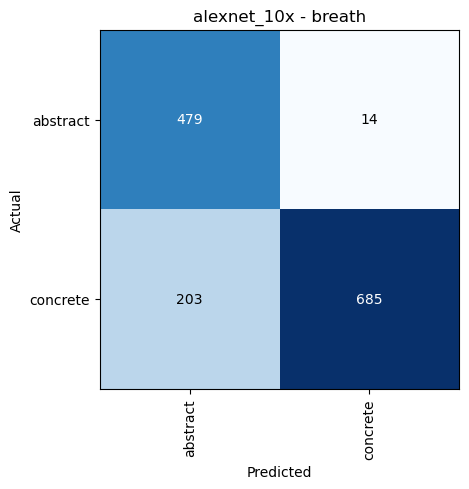

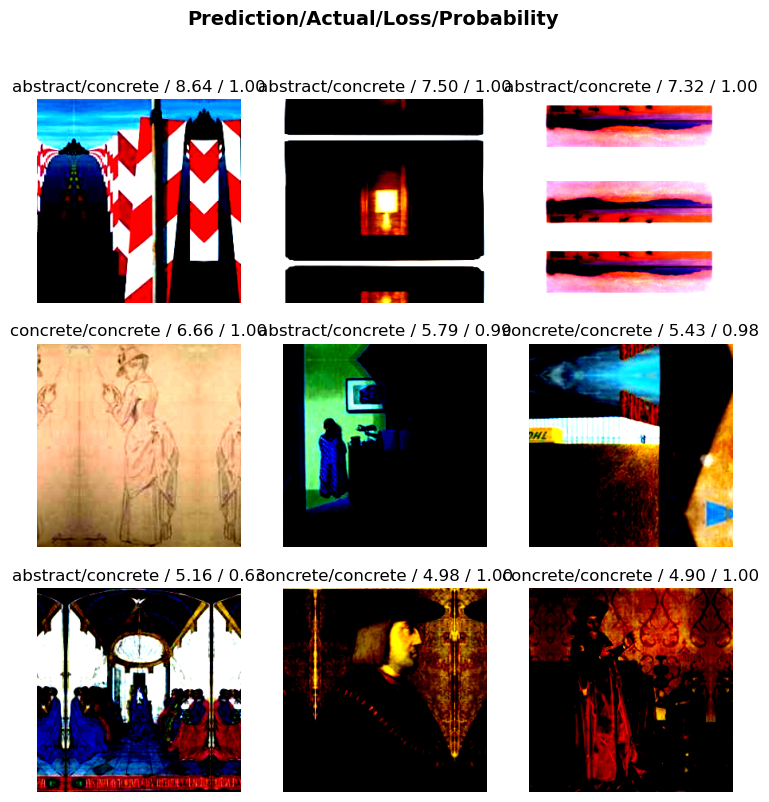

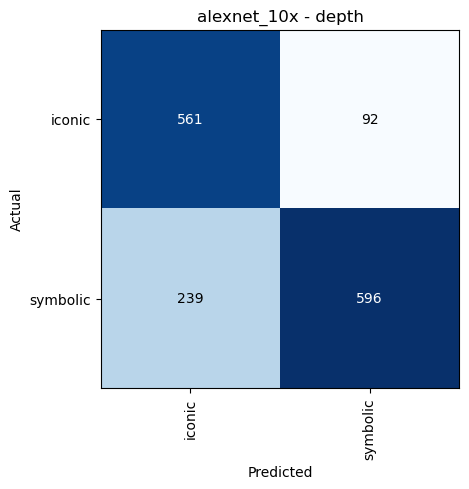

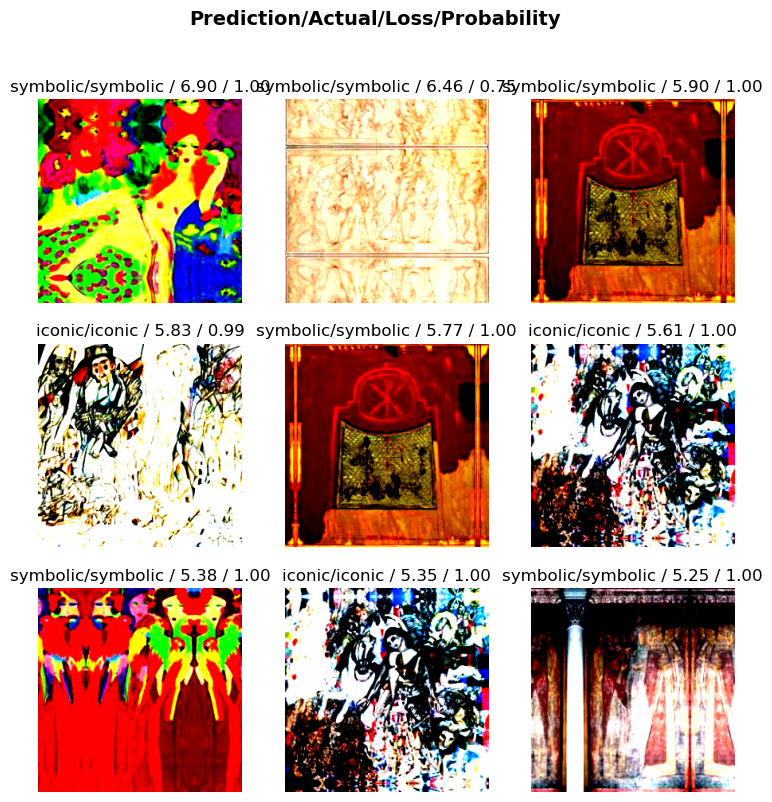

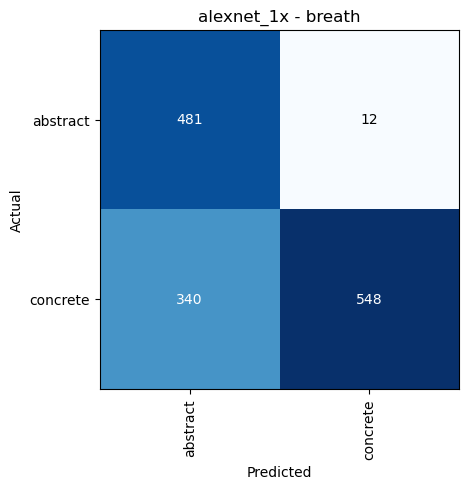

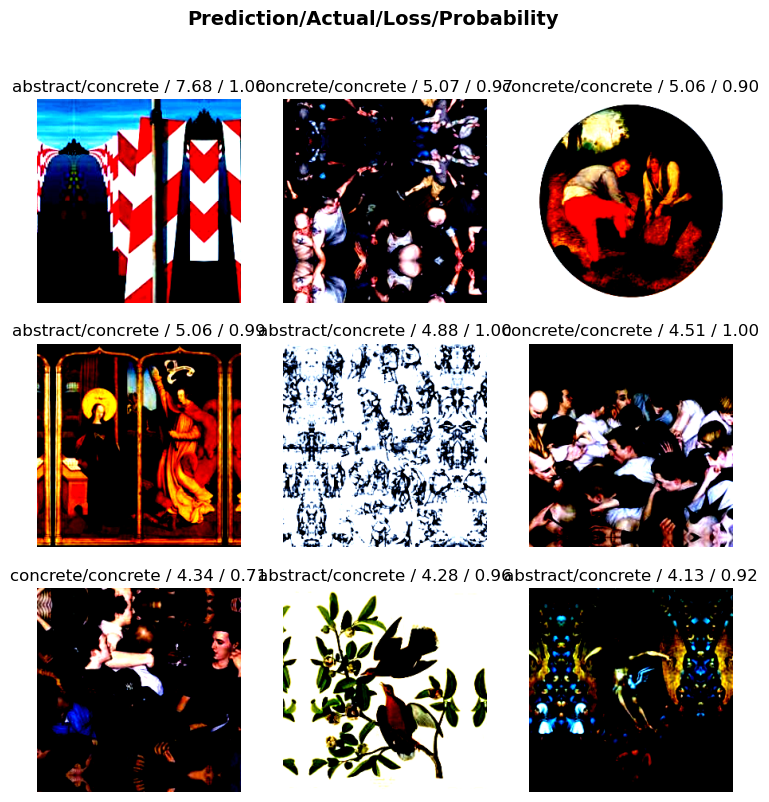

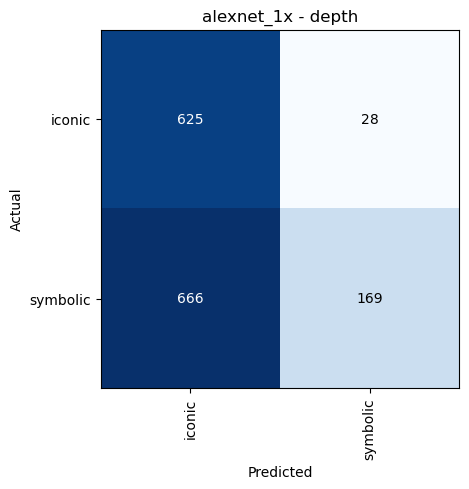

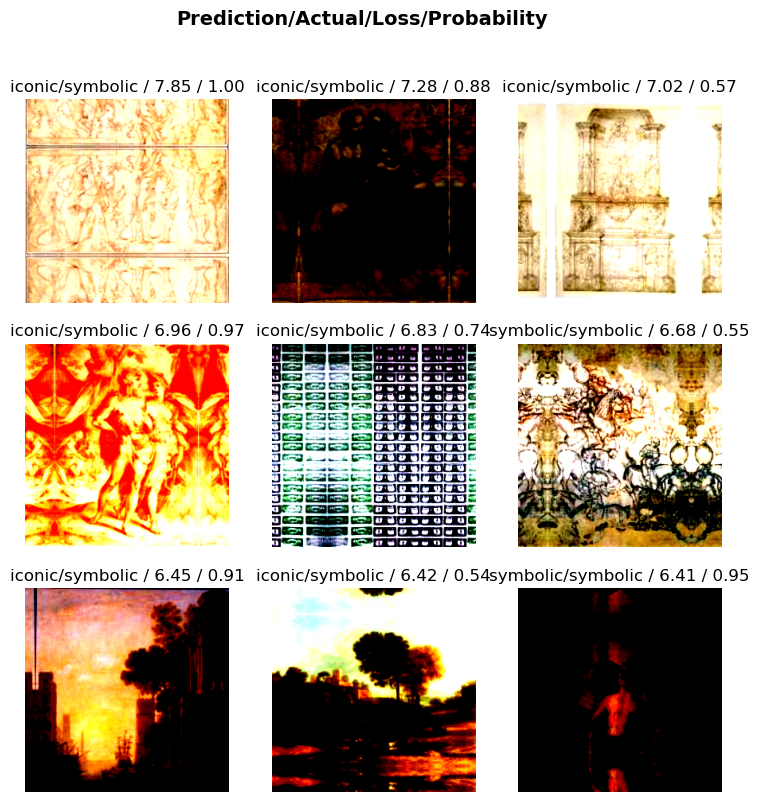

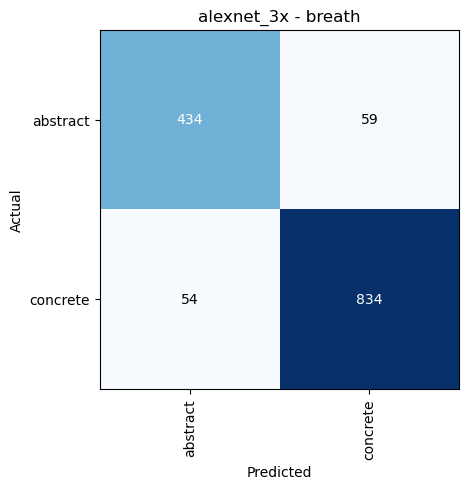

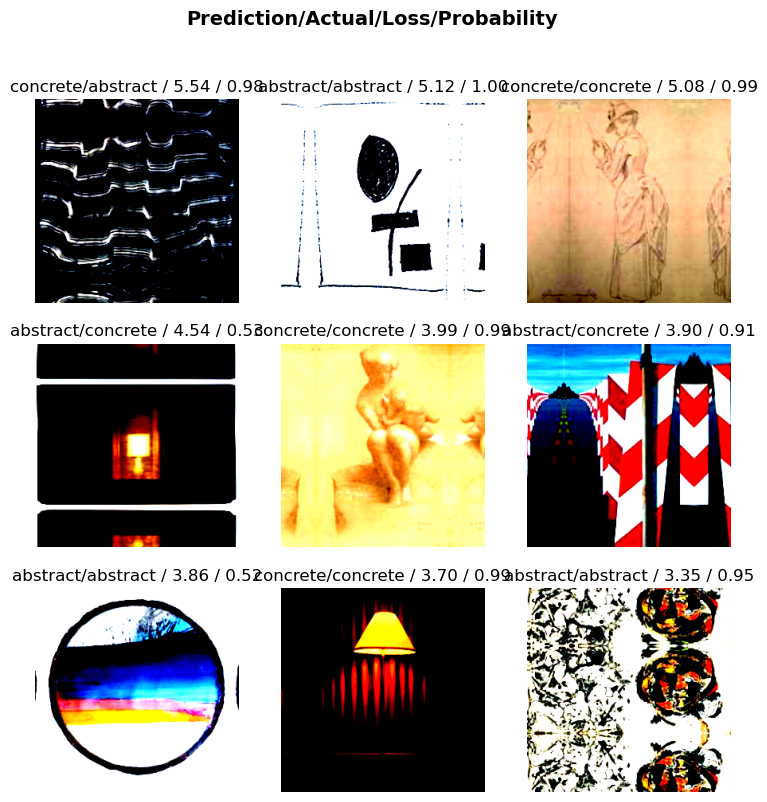

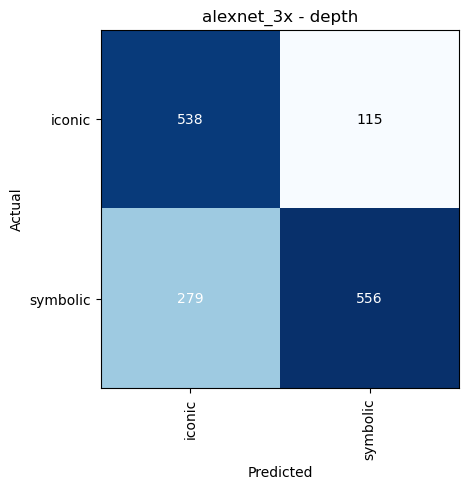

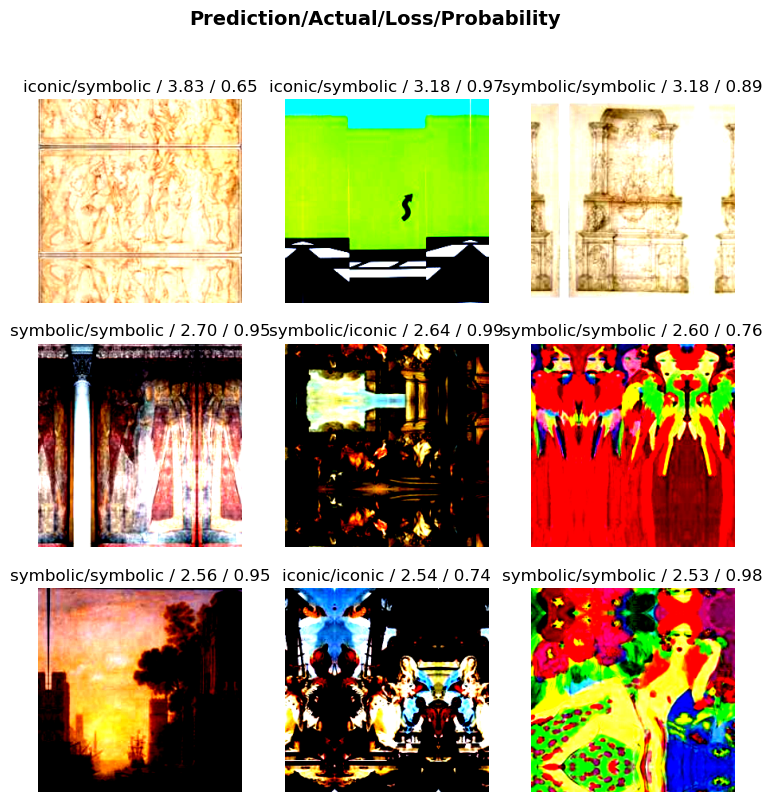

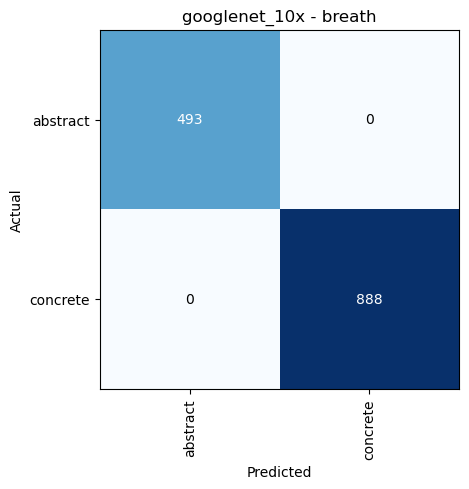

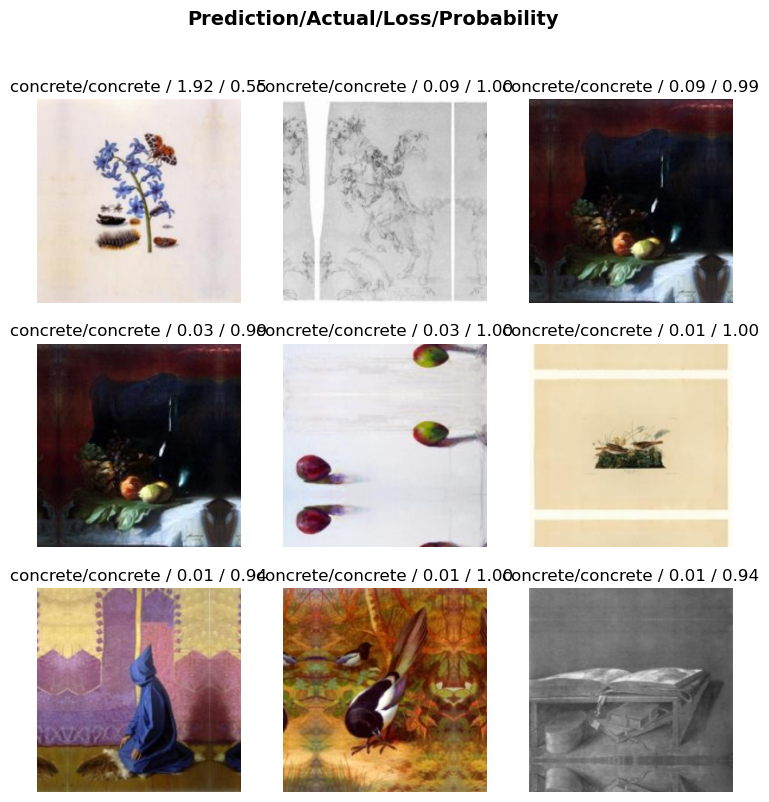

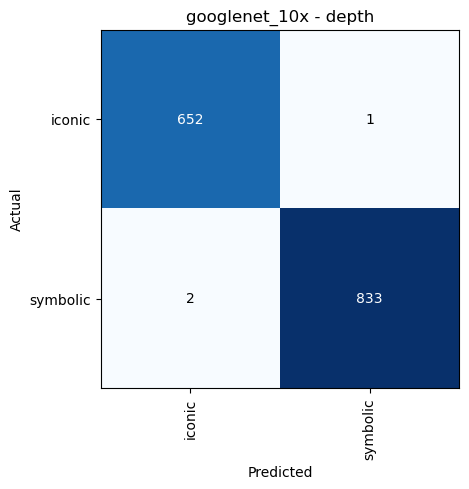

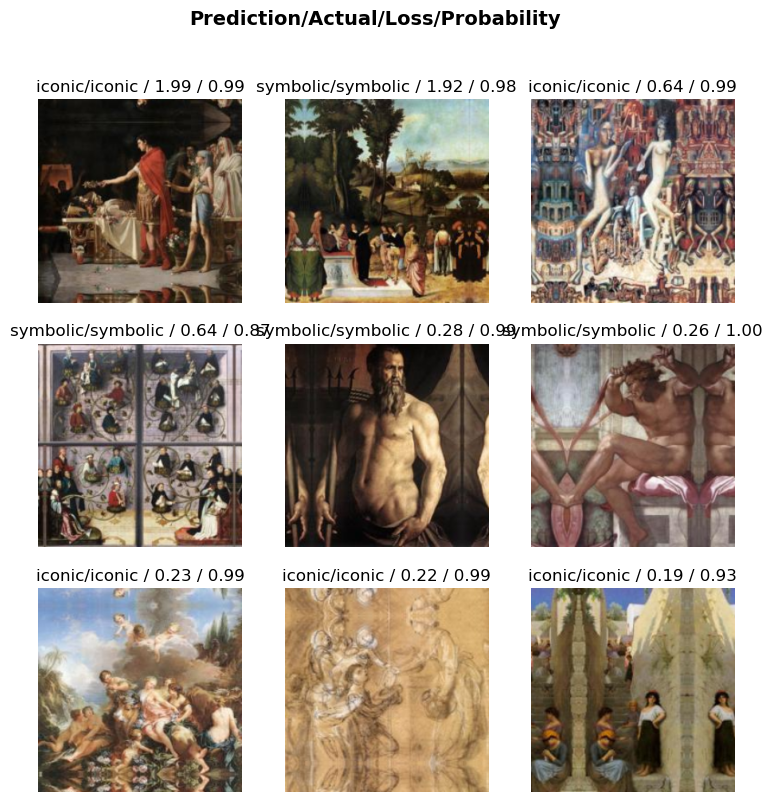

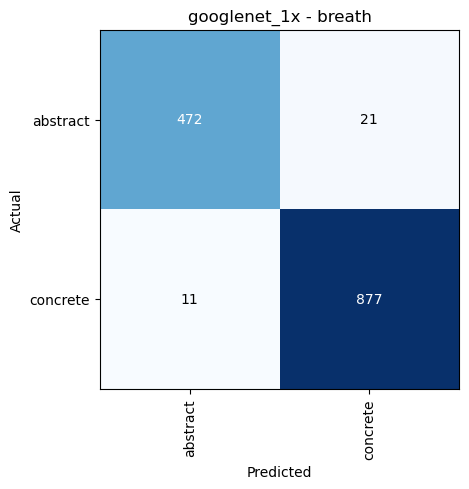

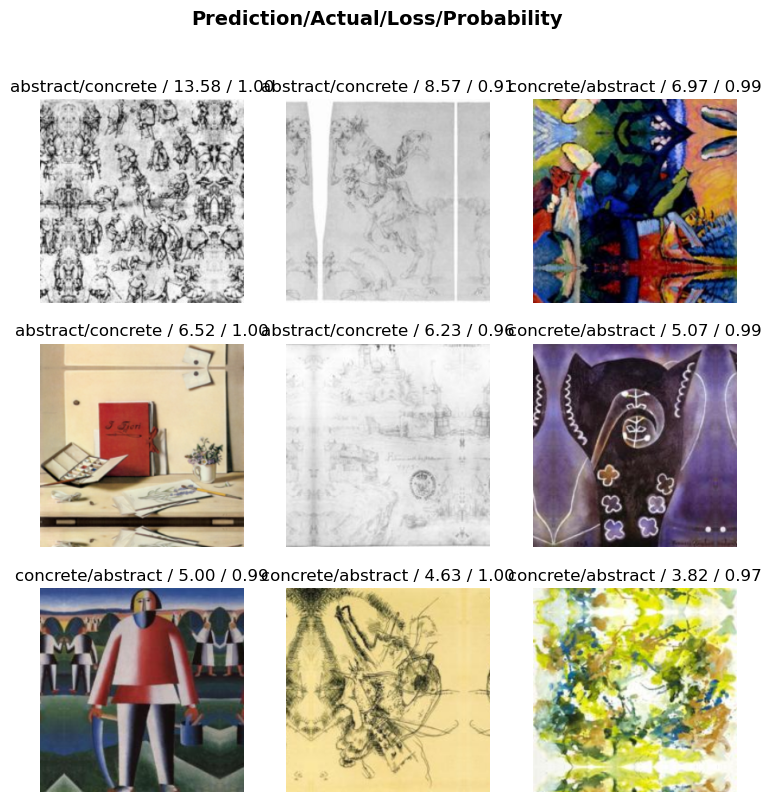

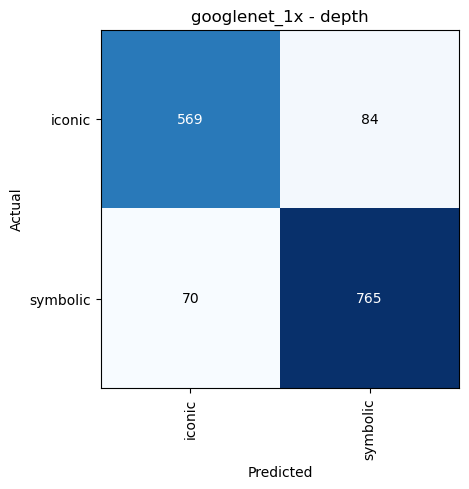

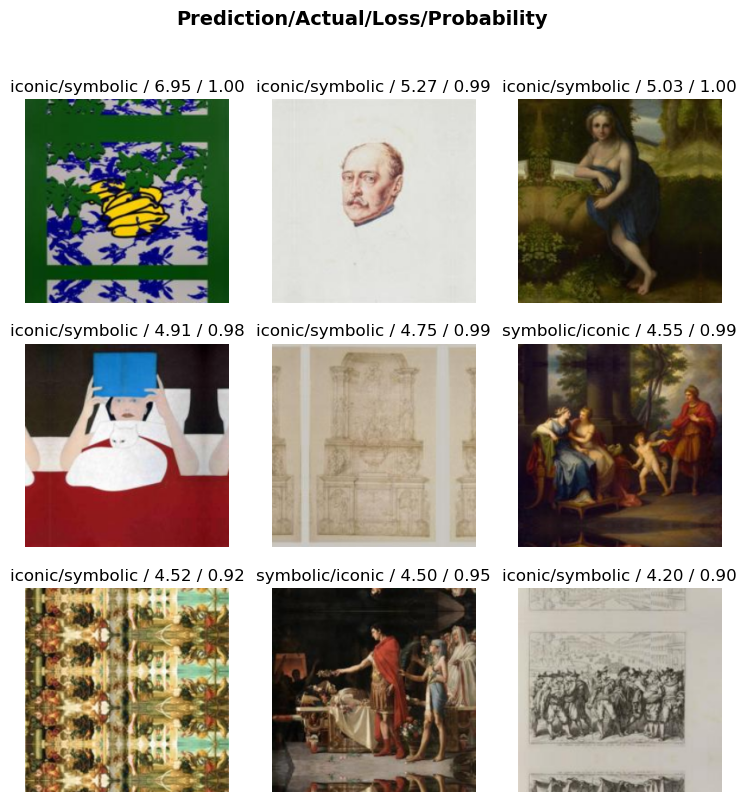

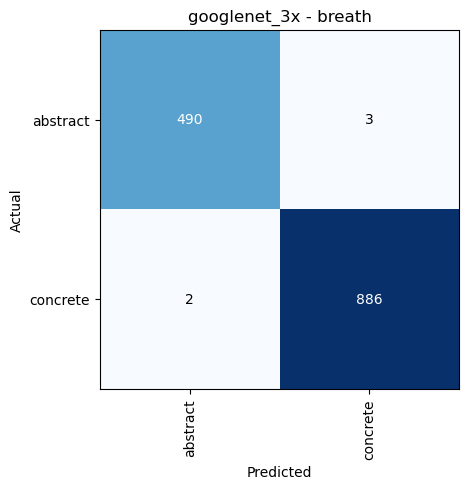

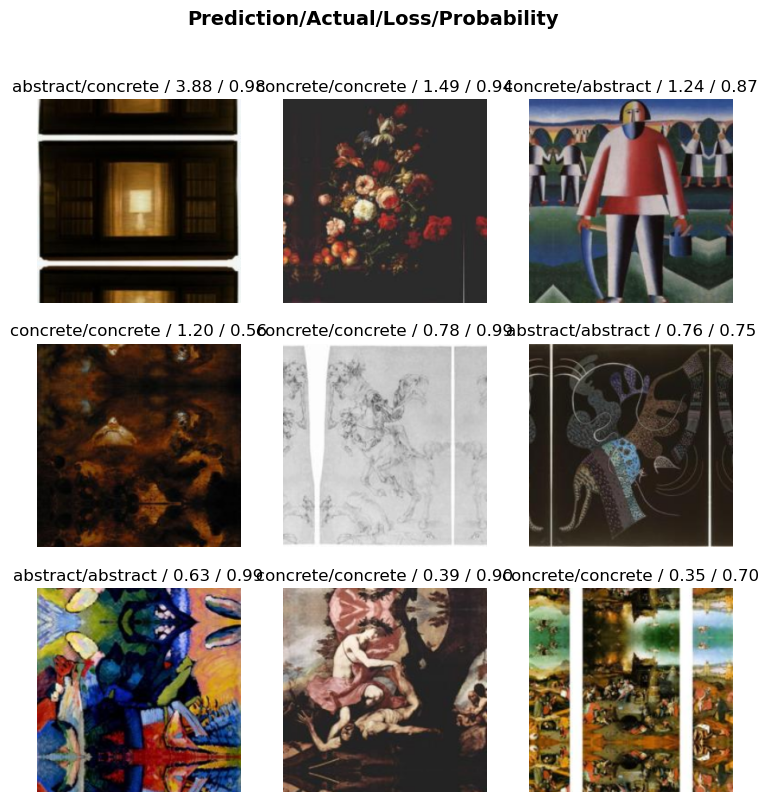

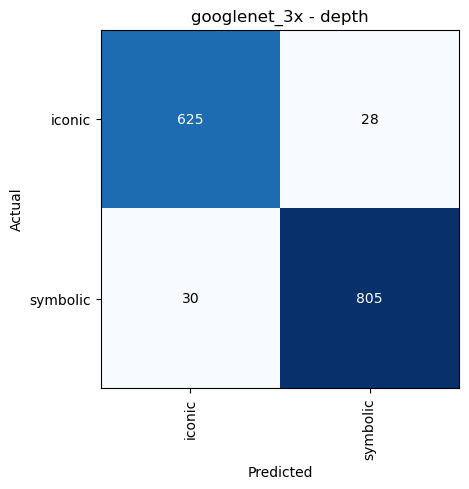

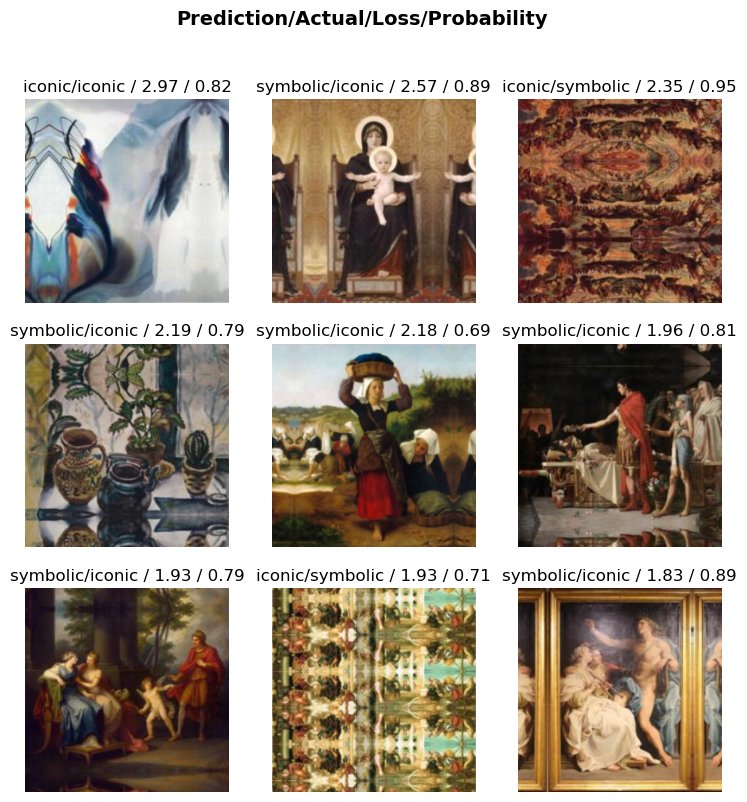

In [4]:
import matplotlib.pyplot as plt

for model_name, model in analyses.items():
    for dimension_name, dimension in model.items():
        title=f"{model_name} - {dimension_name}"
        dimension.plot_confusion_matrix(title=title)
        dimension.plot_top_losses(9, title=title)
plt.close()

In [6]:
for model_name, model in analyses.items():
    for dimension_name, dimension in model.items():
        title=f"{model_name} - {dimension_name}"
        print(model_name, dimension_name, dimension)